In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import xml.etree.ElementTree as ET
import gc

from joblib import Parallel, delayed
from tqdm import *

%matplotlib inline

In [2]:
ROOT = "/media/felipe/SAMSUNG/delicioust140/"

In [3]:
pd.__version__

'0.20.1'

In [4]:
FILE=ROOT+"taginfo.xml"

In [5]:
tree = ET.parse(FILE)

In [6]:
dataset = tree.getroot()

In [7]:
tags_df = pd.DataFrame(columns=['tag','count'])

In [10]:
def get_attribute_dict_from_document_node(document):
    attrs_dict = dict()
    
    for attribute_node in document:
                       
        tags = []
        
        if attribute_node.tag == 'tags':
            for tag_node in attribute_node:
                for subnode in tag_node:
                    if subnode.tag == 'name':
                        if subnode.text is not None:
                            tags.append(subnode.text)
                            
        
            attrs_dict['tags'] = ','.join(tags)              
                        
        else:
            attrs_dict[attribute_node.tag] = attribute_node.text
            
            
    return attrs_dict      

In [11]:
elements = Parallel(n_jobs=-1)(delayed(get_attribute_dict_from_document_node)(document) for document in dataset)

In [12]:
docs_df = pd.DataFrame(columns=['url','hash','filetype','filename','users','tags'])

In [13]:
docs_df = pd.DataFrame.from_records(elements)

In [14]:
docs_df['num_tags'] = docs_df['tags'].apply(lambda tags: len(tags.split(',')))

In [15]:
docs_df.rename(columns={'users':'num_users'},inplace=True)

In [16]:
docs_df['num_users'] = docs_df['num_users'].astype('int64')
docs_df['num_tags'] = docs_df['num_tags'].astype('int64')

In [17]:
docs_df.describe(include=['number'])

,num_users,num_tags
count,144574.000000,144574.000000
mean,182.173109,13.950351
std,663.709148,8.390065
min,1.000000,1.000000
25%,13.000000,6.000000
50%,35.000000,12.000000
75%,121.000000,24.000000
max,46215.000000,31.000000


In [18]:
docs_df.describe(include=['category','object'])

,filename,filetype,hash,tags,url
count,144574,144574,144574,144574,144574
unique,144574,5,144574,144032,144574
top,78f0d8cfae35f56be348a02e98b36a9f.html,html,d6a194b228ddd84cda253ac33ff8221d,"wordpress,themes,theme",http://www.xchangeuk.com/
freq,1,143716,1,15,1


In [19]:
docs_df.dtypes

filename     object
filetype     object
hash         object
tags         object
url          object
num_users     int64
num_tags      int64
dtype: object

In [43]:
docs_df.sample(10)

,filename,filetype,hash,tags,url,num_users,num_tags
137786,d949616cb5645e6b2d877645bdb92f6d.html,html,d949616cb5645e6b2d877645bdb92f6d,"recipes,food,recipe",http://www.domesticgoddess.ca/recipes.php?reci...,11,3
51839,2c00dec317778bd95693f617727b3dcb.html,html,2c00dec317778bd95693f617727b3dcb,"java,swing,programming,gui,mac,osx,native,wind...",http://today.java.net/pub/a/today/2003/12/08/s...,106,23
35608,d92e1ec143ab0c97e252feed17259324.html,html,d92e1ec143ab0c97e252feed17259324,"vintage,fashion,shopping,clothing,shoes,access...",http://www.vivalavintage.com/index.shtml,16,6
130244,95f307e6cca487b505caafa28d623197.html,html,95f307e6cca487b505caafa28d623197,"youtube,tools,video,web2.0,collection,videos,w...",http://www.quickonlinetips.com/archives/2006/1...,1108,25
5789,0e1f977a1f69c836ab49efd59cfb5397.html,html,0e1f977a1f69c836ab49efd59cfb5397,"sewing,blog,blogs,crafts,crafty,craft,felt,han...",http://www.cyncontemporary.blogspot.com/,12,8
123578,5fd98471343dd50b8c071167a5fc2dc4.html,html,5fd98471343dd50b8c071167a5fc2dc4,"food,indian,recipe,daal,recipes,cooking,dal,le...",http://www.route79.com/food/daal.htm,56,11
107700,047a1f413596c09e2cf2b409c057a700.html,html,047a1f413596c09e2cf2b409c057a700,"javascript,gallery,jquery,css,images,slideshow...",http://code.google.com/p/galleria/,162,25
114565,922ebdd241dd6a5e9f6bd90267d24f21.html,html,922ebdd241dd6a5e9f6bd90267d24f21,"git,tutorial,scm,versioncontrol,article,pdf,de...",http://www.newartisans.com/blog_files/git.from...,293,25
66140,e71d9f5bd9853a79132cd4a9078415bc.html,html,e71d9f5bd9853a79132cd4a9078415bc,"music,mp3,blog,mp3blog,vinyl,blogs,records,aud...",http://crudcrud.blogspot.com/,143,26
16728,6e8aef500b4cc01a048414f55258aba3.html,html,6e8aef500b4cc01a048414f55258aba3,"geek,fashion,pants,keyboard,funny,technology,d...",http://www.vouspensez.com/2008/04/22/the-geeki...,141,25


In [45]:
docs_df[docs_df['num_users']<=2].sort_values('num_users')

,filename,filetype,hash,tags,url,num_users,num_tags
30571,9862166e802a18542e9f22be3b2b8dc4.html,html,9862166e802a18542e9f22be3b2b8dc4,"flash,design,motorola,website,animation,microsite",http://www.soulpolice.com/motorolacity/,1,6
139,01879557192bc8bcc69f78711aa580a1.html,html,01879557192bc8bcc69f78711aa580a1,"javascript,keyboard,shortcuts",http://livepipe.net/extra/hotkey,2,3
92151,7e0ae721974661bd84f1d4e20464d33e.html,html,7e0ae721974661bd84f1d4e20464d33e,"health,tips,,loss,weight,",http://how-to-health.blogspot.com/,2,6
92142,e3230e1809a7d428b6a563afd6289df6.html,html,e3230e1809a7d428b6a563afd6289df6,"online,rentals,condo,booking,hollywood,beach,v...",http://hollywoodflvacationrentals.com/,2,12
92047,3e35d090e633db29209444bd100fc3b8.html,html,3e35d090e633db29209444bd100fc3b8,"print,osx,freeware,server,printing",http://homepage.mac.com/barijaona/print66/pres...,2,5
92028,c0d40e4d854b1518cee6d261ce5fec04.html,html,c0d40e4d854b1518cee6d261ce5fec04,"history,brain,evolution",http://scienceblogs.com/neurophilosophy/2008/0...,2,3
92005,86138cb8d2008ba6b5970af9650000e7.html,html,86138cb8d2008ba6b5970af9650000e7,"math,fractals,chaos",http://scienceblogs.com/goodmath/goodmath/topo...,2,3
91955,eabad7a90677ff1bedd138e5bbec5cf6.html,html,eabad7a90677ff1bedd138e5bbec5cf6,"webdesign,inspiration,wordpress",http://scribblescratch.com/themes4/,2,3
91915,fcab34a2e8c6055625c2915ac55c335e.html,html,fcab34a2e8c6055625c2915ac55c335e,"database,programming,java,tools,testing,unitte...",http://schemamule.sourceforge.net/index.html,2,6
91859,6a815f1b54c2f4c37629ea535fe64891.html,html,6a815f1b54c2f4c37629ea535fe64891,"download,music,tools",http://sciagnik.net/,2,3


filetype
html    143716
pdf        424
swf         75
txt         94
xml        265
Name: hash, dtype: int64


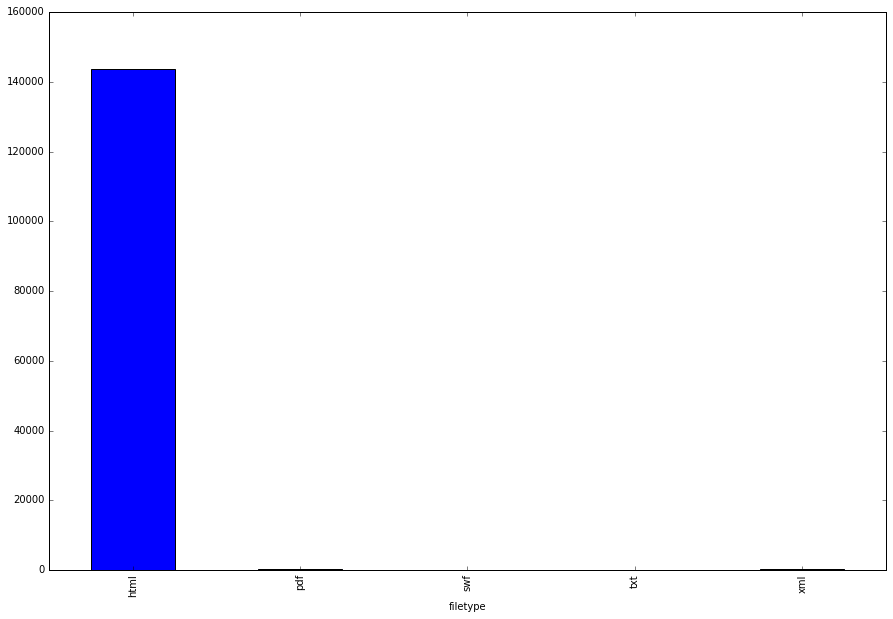

In [20]:
# number of documents by type

fig = plt.gcf()

fig.set_size_inches(15,10)

grouped = docs_df.groupby('filetype')['hash'].size()

print(grouped)

grouped.plot(kind='bar')

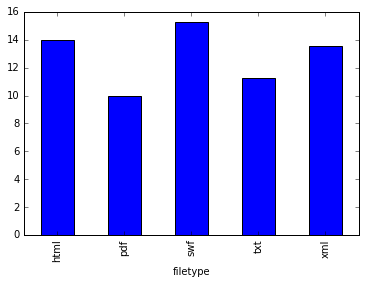

In [21]:
# mean num_tags by type
docs_df.groupby('filetype')['num_tags'].mean().plot(kind='bar')

filetype
html    182.584750
pdf      32.783019
swf     245.893333
txt      69.148936
xml     220.011321
Name: num_users, dtype: float64


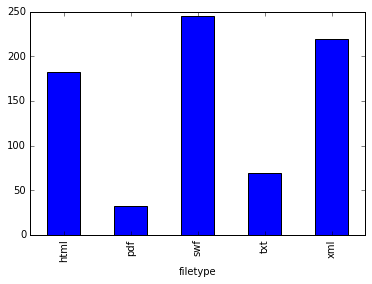

In [22]:
# mean num_users by type

grouped = docs_df.groupby('filetype')['num_users'].mean()

print(grouped)

grouped.plot(kind='bar')

In [23]:
max(set(docs_df['num_users'].values))

46215

(-1, 100)

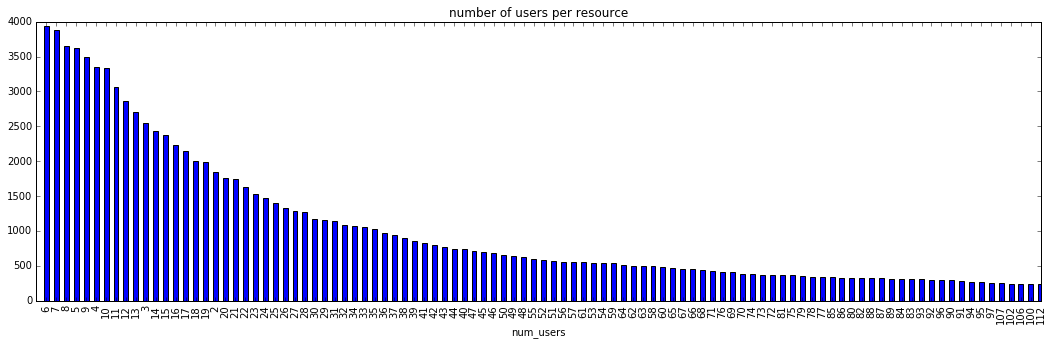

In [24]:
plt.clf()
docs_df.groupby('num_users').count()['hash'].sort_values(ascending=False).plot(kind='bar')

fig = plt.gcf()
fig.set_size_inches(18,5)

plt.gca().set_title('number of users per resource')
plt.gca().set_xlim(-1,100)

In [25]:
len(docs_df[docs_df['num_tags'] == 25])

31511

(-1, 30)

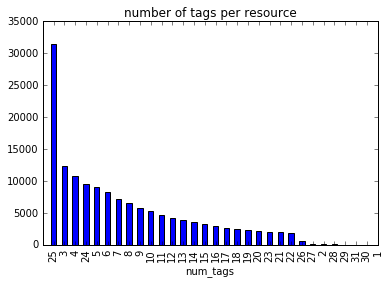

In [26]:
docs_df.groupby('num_tags').count()['hash'].sort_values(ascending=False).plot(kind='bar')
plt.gca().set_title('number of tags per resource')
plt.gca().set_xlim(-1,30)

In [35]:
# total tags

tagsets = [tagset.split(',') for tagset in docs_df["tags"].values]


In [38]:
flat_list = []

for tagset in tagsets:
    for tag in tagset:
        flat_list.append(tag)
        
flat_set = set(flat_list)        

In [40]:
len(flat_set)

66023

In [41]:
sorted(flat_set)

['',
 '!',
 '!!!',
 '!!!financial',
 '!!canoe',
 '!important',
 '!mp3',
 '!music',
 '!read.on',
 '!songbird',
 '#1',
 '#develop',
 '#due_south',
 '$',
 '$$$',
 '$1',
 '$10',
 '$100',
 '$20',
 '$_server',
 '$path',
 '%s',
 '&',
 "'80s",
 "'see'",
 '(cam)',
 '(design)',
 '(firefly)',
 '(fragmented)',
 '(free)',
 '(quando',
 '(tony)',
 '(x)html',
 '*',
 '**',
 '***',
 '****',
 '*****',
 '*articles',
 '*audiovideo',
 '*blog',
 '*book',
 '*box',
 '*css',
 '*design',
 '*eightmedia',
 '*firefox',
 '*game',
 '*hurt/comfort',
 '*javascript',
 '*life',
 '*lifehack',
 '*lifehacks',
 '*mac',
 '*n*x',
 '*nix',
 '*opera',
 '*pc',
 '*programming',
 '*seoã\x83\x84ã\x83¼ã\x83«',
 '*software',
 '*tips',
 '*to.read',
 '*todo',
 '*toread',
 '*video',
 '*web',
 '*webdesign',
 '*webservice',
 '*webã\x82µã\x83¼ã\x83\x93ã\x82¹',
 '*webå\x88¶ä½\x9c',
 '*webç´\xa0æ\x9d\x90',
 '*wordpress',
 '*ã\x81¾ã\x81¨ã\x82\x81',
 '*ã\x83\x97ã\x83\xadã\x82°ã\x83©ã\x83\x9fã\x83³ã\x82°',
 '+',
 '++',
 '+2000words',
 '+39',
 '+